# <font color='blue'>UNINOVE - Ciência de Dados</font>

## Tópico 20 - Introdução ao Aprendizado de Máquina em Python (Scikit-learn)

In [1]:
# Versão da Linguagem Python
from platform import python_version
print('Versão da Linguagem Python Usada Neste Jupyter Notebook:', python_version())

Versão da Linguagem Python Usada Neste Jupyter Notebook: 3.9.7


### Exemplo 1

Como dados de teste vamos utilizar a seguinte lógica:

<ul>
    <li>Para valores entre 1 e 30 teremos saída igual a 1</li>
    <li>Para valores entre 31 e 60 teremos saída igual a 2</li>
    <li>Para valores entre 61 e 100 teremos saída igual a 3</li>
</ul>

In [2]:
# importando bibliotecas
from sklearn.naive_bayes import GaussianNB
import numpy as np

<i>entrada</i> - dados de entrada. Note que para o exemplo dado foi considerado somente uma variável de entrada (valores entre 1 e 100)

<i>saida</i> - dados de saída. Para cada valor de entrada foi associado um valor de saída conforme regra informada acima (valores igual a 1, 2 e 3).

In [3]:
entrada = np.array([[1],[4],[35],[60],[61],[70],[80],[90],[100],[30],[16],[19],[31],[50],[55]])
saida = np.array(  [1, 1, 2, 2, 3, 3, 3, 3, 3, 2, 1, 1, 2, 2, 2])

# associado o algoritmo de Naye Bayes a variável model
model = GaussianNB()
# variável model preenchida com os dados de entrada/saída
model.fit(entrada, saida)
# efetuada a predição para os valores 20, 40 e 85
predicted= model.predict([[20],[40],[85]])
# impressão resultado
print(predicted)

[1 2 3]


### Exemplo 2

Vamos agora a um exemplo mais sofisticado, que foi criado baseado no exemplo encontrado em:

https://www.digitalocean.com/community/tutorials/como-construir-um-classificador-de-machine-learning-em-python-com-scikit-learn-pt

O conjunto de dados (dataset) com o qual iremos trabalhar nestes próximos exemplos é o dataset <i>Breast Cancer Wisconsin Diagnostic Database</i>.

O dataset inclui várias informações sobre tumores de câncer de mama, classificando-os em malignos ou benignos. O dataset possui informação acerca de 569 pacientes com tumores de câncer de mama e 30 diferentes características acerca de cada um destes pacientes tais como o raio do tumor, textura, suavidade, área etc

O dataset que será utilizado nos exemplos que se seguem <b>vêm instalado no Scikit-learn</b>. Vale ressaltar no Scikit-learn temos vários outros datasets que podemos carregar no Python.

Inicialmente vamos efetuar a leitura de dados e vamos compreender o que tais dados nos dizem:

In [4]:
# importando dados do dataset
from sklearn.datasets import load_breast_cancer
# leitura do dataset que foi carregado na variável dados 
dados = load_breast_cancer()

Carregadas as variáveis <i>titulo_saida</i>, <i>valores_saida</i>, <i>titulo_característica</i> e <i>valores_caracteristica</i> a partir dos dados da variável <i>dados</i>, sendo que tais dados são acessados pelas chaves correspondentes (lembrando que a variável dados é uma estrutura de dados dicionário).

In [5]:
titulo_saida = dados['target_names']
valores_saida = dados['target']
titulo_caracteristica = dados['feature_names']
valores_caracteristica = dados['data']

# impressão dos dados
print('Classificações existentes: ',titulo_saida)
print('Saídas possíveis: ',valores_saida[0],valores_saida[20])
print('Características: ',titulo_caracteristica)
print('Valores associados a característica de um indivíduo: ',valores_caracteristica[0])

Classificações existentes:  ['malignant' 'benign']
Saídas possíveis:  0 1
Características:  ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
Valores associados a característica de um indivíduo:  [1.799e+01 1.038e+01 1.228e+02 1.001e+03 1.184e-01 2.776e-01 3.001e-01
 1.471e-01 2.419e-01 7.871e-02 1.095e+00 9.053e-01 8.589e+00 1.534e+02
 6.399e-03 4.904e-02 5.373e-02 1.587e-02 3.003e-02 6.193e-03 2.538e+01
 1.733e+01 1.846e+02 2.019e+03 1.622e-01 6.656e-01 7.119e-01 2.654e-01
 4.601e-01 1.18

### Exemplo 3

Agora vamos ao exemplo 3, onde será efetuado o aprendizado de máquina e verificaremos o percentual de sucesso da predição dos dados aplicando-se o  o algoritmo de Naye Bayes considerando distribuição normal (Gaussiana)

In [6]:
# importando dataset
from sklearn.datasets import load_breast_cancer

# importando bibliotecas
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# opções que serão utilizadas na impressão do gráfico
labels = 'Correto', 'Erro'
# define espaçamento do gráfico
explode = (0.1,0.1)

# carrega os dados do dataset
dados = load_breast_cancer()

Quebra dos dados presentes no dataset <i>Breast Cancer Wisconsin Diagnostic Database</i>. 

Serão gerados dois pares de arquivos:
<ul>
    <li>Par 1: treino e treino_saida</li>
    <li>Par 2: teste e teste_saida</li>
</ul>

onde cada par de arquivos conterá metade dos dados presentes no dataset origem <b>(test_size = 0.5)</b>. A função responsável por efetuar tal quebra é a função <b>train_test_split()</b>. 

Metade dos dados associados a entrada dos dados (chave <i>data</i>) serão gravados respectivamente nas variáveis </i>treino</i> e <i>teste</i>. 

Metade dos dados associados a saída dos dados (chave <i>target</i>) serão gravados respectivamente nas variáveis <i>treino_saida</i> e <i>teste_saida</i>. 

A seleção de tais dados é aleatória e utiliza como <b>semente</b> o valor 40 <b>(random_state = 40)</b>. Obviamente que apesar da aleatoriedade ele mantém a associação/relação existente entre os dados de entrada e saída. O fato se termos e usarmos uma semente garante que a seleção que é feita de modo aleatório será a mesma, logo teremos os mesmos resultados para o mesmo conjunto de dados em diferentes execuções. Caso não utilizemos uma semente, os valores aleatórios serão diferentes para diferentes execuções e teremos resultados diferentes para o mesmo conjunto de dados em diferentes execuções.

In [7]:
treino, teste, treino_saida, teste_saida = train_test_split(dados['data'], dados['target'], test_size=0.5,random_state=40)

Realizado o treinamento utilizando-se dos dados presentes em <i>treino</i> e <i>treino_saida</i>, aplicando o algoritmo de Naye Bayes considerando distribuição normal (Gaussiana). É neste momento em que a máquina é treinada, é neste momento onde o aprendizado de máquina ocorre.

In [8]:
modelo = GaussianNB()
modelo.fit(treino, treino_saida)

GaussianNB()

Predição efetuada para os dados presentes na variável <i>teste</i> (dados de entrada). Note que o programa desconhece qual são os resultados reais (variável <i>teste_saida</i>). Nesta etapa o programa determina, baseado nas 30 características relacionados a cada tumor, se o tumor é maligno ou benigno.

In [9]:
preds = modelo.predict(teste)

Criação de variáveis que nos auxiliarão a calcular o percentual de precisão da predição.

In [15]:
cont = 0
correto = 0
erro = 0

Percorre-se cada caso que foi utilizado na predição, imprime-se o valor esperado (real) e a predição e se o mesmo foi correto (OK) ou não (ERRO).

Esperado:  1 . Predição:  1  - OK
Esperado:  0 . Predição:  0  - OK
Esperado:  1 . Predição:  1  - OK
Esperado:  1 . Predição:  1  - OK
Esperado:  0 . Predição:  0  - OK
Esperado:  1 . Predição:  1  - OK
Esperado:  1 . Predição:  1  - OK
Esperado:  1 . Predição:  1  - OK
Esperado:  1 . Predição:  0  - ERRO
Esperado:  1 . Predição:  1  - OK
Esperado:  0 . Predição:  0  - OK
Esperado:  1 . Predição:  1  - OK
Esperado:  1 . Predição:  1  - OK
Esperado:  1 . Predição:  1  - OK
Esperado:  0 . Predição:  0  - OK
Esperado:  1 . Predição:  1  - OK
Esperado:  1 . Predição:  1  - OK
Esperado:  1 . Predição:  1  - OK
Esperado:  1 . Predição:  1  - OK
Esperado:  1 . Predição:  1  - OK
Esperado:  1 . Predição:  1  - OK
Esperado:  0 . Predição:  0  - OK
Esperado:  1 . Predição:  1  - OK
Esperado:  0 . Predição:  0  - OK
Esperado:  0 . Predição:  0  - OK
Esperado:  0 . Predição:  0  - OK
Esperado:  0 . Predição:  0  - OK
Esperado:  0 . Predição:  0  - OK
Esperado:  1 . Predição:  1  - OK
Esperado:  1

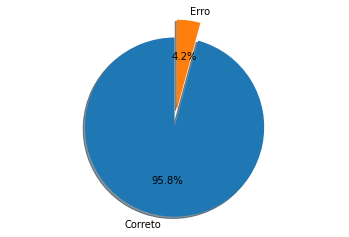

In [16]:
for i in (preds):
    if (teste_saida[cont] == preds[cont]):
      print('Esperado: ',teste_saida[cont],'. Predição: ',preds[cont],' - OK')
      correto = correto + 1
    else:
      print('Esperado: ',teste_saida[cont],'. Predição: ',preds[cont],' - ERRO')
      erro = erro + 1
    cont = cont + 1

# percentual de acerto 
print(correto / (correto + erro))
# percentual de acerto calculado por função do Python
print(accuracy_score(teste_saida, preds))

# gerando gráfico
sizes = [correto, erro]
plt.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
plt.axis('equal')  
plt.show()